In [ ]:
#!pip install bayesian-optimization  # for google collab
#!pip install git+https://github.com/slremy/netsapi --user --upgrade


In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from matplotlib import gridspec
%matplotlib inline

In [ ]:
#challenge import
from netsapi.challenge import *
 
from sys import exit, exc_info, argv
from multiprocessing import Pool, current_process
import random as rand
import json
import requests
import numpy as np
import pandas as pd


import statistics
from IPython.display import clear_output

from contextlib import contextmanager
import sys, os
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("done")

In [ ]:
def newHoleEnv():
    return ChallengeProveEnvironment()#ChallengeSeqDecEnvironment() #Initialise a New Challenge Environment to post entire policy

env = newHoleEnv()


x_start = 0.0
x_end = 1.0

VAL_Max = 1.2 # fel heat map

def target1(x, y):
    x = np.asscalar(x)
    y = np.asscalar(y)
    env.reset()
    action = [x , y]
    #print("action",action)
    s,r,d,_ = env.evaluateAction(action)
    return r/90.0    

def target(x,y):
    if type(x) is np.ndarray:
        result = []
        for a,b in zip(x,y):
            reward = target1(a,b)
            result.append( reward )
            #print((len(result) % 30 ) )
            #if ((len(result) % 30 ) > 25) : 
            #    global env
            #    env = newHoleEnv()
        return result
    else:
        return target1(x,y)


In [ ]:
# for the training
n = 1e5
x = y = np.linspace(x_start, x_end, 300)# was 300
X, Y = np.meshgrid(x, y)
x = X.ravel()
y = Y.ravel()
X = np.vstack([x, y]).T[:, [1, 0]]

In [ ]:
def posterior(bo, X):
    #ur = unique_rows(bo.X)
    x_obs = np.array([[res["params"]["x"], res["params"]["y"]] for res in bo.res])
    y_obs = np.array([res["target"] for res in bo.res])
    
    bo._gp.fit(x_obs, y_obs)
    
    mu, sigma = bo._gp.predict(X, return_std=True)
    return mu, sigma

def plot_2d(name=None):

    mu, s = posterior(y1hm, X)

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    gridsize=150

    # fig.suptitle('Bayesian Optimization in Action', fontdict={'size':30})
    x_obs = np.array([[res["params"]["x"], res["params"]["y"]] for res in y1hm.res])
    # GP regression output
    ax[0][0].set_title('Gausian Process Predicted Mean; max='+str(round(np.amax(mu)*90,0))+" min="+str(round(np.amin(mu)*90,0)), fontdict={'size':15})
    im00 = ax[0][0].hexbin(x, y, C=mu, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-VAL_Max, vmax=VAL_Max)
    ax[0][0].axis([x.min(), x.max(), y.min(), y.max()])
    ax[0][0].plot(x_obs[:, 1], x_obs[:, 0], 'D', markersize=4, color='k', label='Observations')

    ax[0][1].set_title('Target Function', fontdict={'size':15})
    """
    im10 = ax[0][1].hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-VAL_Max, vmax=VAL_Max)
    ax[0][1].axis([x.min(), x.max(), y.min(), y.max()])
    #ax[0][1].plot(bo.X[:, 1], bo.X[:, 0], 'D', markersize=4, color='k')
    ax[0][1].plot(x_obs[:, 1], x_obs[:, 0], 'D', markersize=4, color='k')
    """

    ax[1][0].set_title('Gausian Process Variance', fontdict={'size':15})
    im01 = ax[1][0].hexbin(x, y, C=s, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=0, vmax=1)
    ax[1][0].axis([x.min(), x.max(), y.min(), y.max()])

    ax[1][1].set_title('Acquisition Function', fontdict={'size':15})
    # acquisition func
    """
    im11 = ax[1][1].hexbin(x, y, C=ut, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=0, vmax=8)

    np.where(ut.reshape((300, 300)) == ut.max())[0]
    np.where(ut.reshape((300, 300)) == ut.max())[1]

    ax[1][1].plot([np.where(ut.reshape((300, 300)) == ut.max())[1]/50., 
                   np.where(ut.reshape((300, 300)) == ut.max())[1]/50.], 
                  [0, 6], 
                  'k-', lw=2, color='k')

    ax[1][1].plot([0, 6],
                  [np.where(ut.reshape((300, 300)) == ut.max())[0]/50., 
                   np.where(ut.reshape((300, 300)) == ut.max())[0]/50.], 
                  'k-', lw=2, color='k')

    ax[1][1].axis([x.min(), x.max(), y.min(), y.max()])
    """
    for im, axis in zip([im00, im01], ax.flatten()):#, im10, im11
        cb = fig.colorbar(im, ax=axis)
        # cb.set_label('Value')

    if name is None:
        name = '_'

    plt.tight_layout()

    # Save or show figure?
    # fig.savefig('bo_eg_' + name + '.png')
    plt.show()
    plt.close(fig)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.10413014145809518, 0.43898800749213995]
60  Evaluations Remaining
|  1        | -0.007331 |  0.1041   |  0.439    |
action [0.3188445172008456, 0.7116941193377846]
59  Evaluations Remaining
|  2        | -0.3715   |  0.3188   |  0.7117   |
action [0.9503119235904112, 0.5028402917011021]
58  Evaluations Remaining
|  3        | -0.07523  |  0.9503   |  0.5028   |
action [0.4057071739457363, 0.8642765623667288]
57  Evaluations Remaining
|  4        |  0.1667   |  0.4057   |  0.8643   |
action [0.10716410737050341, 0.8548813711287028]
56  Evaluations Remaining
|  5        | -0.2766   |  0.1072   |  0.8549   |


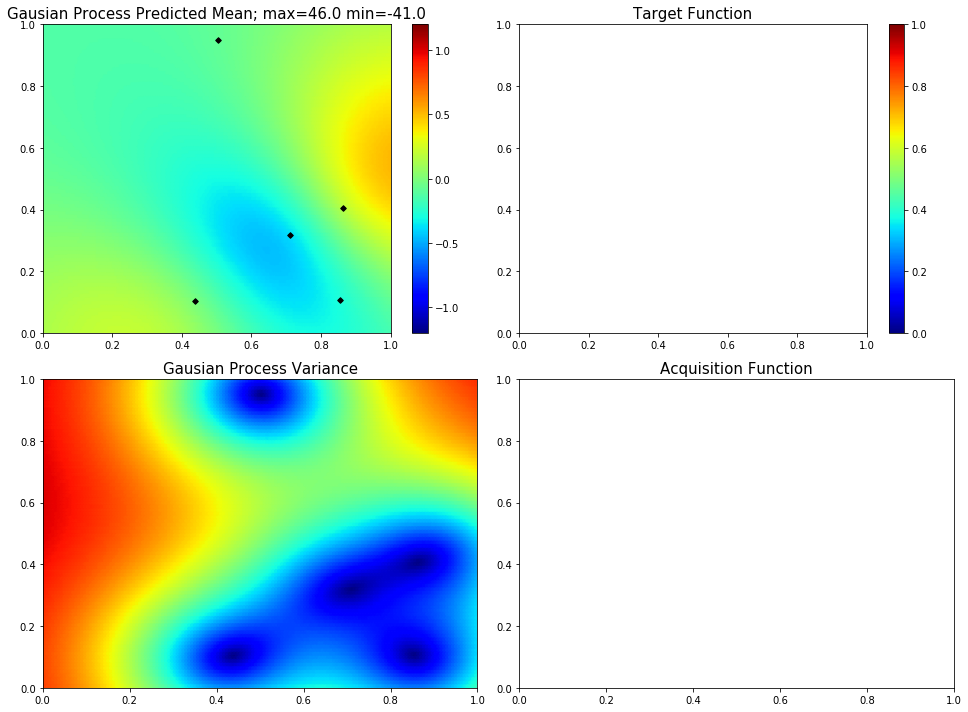

In [50]:
y1hm = BayesianOptimization(target, {'x': (x_start, x_end), 'y': (x_start, x_end)})

used_kappa = 10

y1hm.maximize(init_points=5, n_iter=0, acq='ucb', kappa=used_kappa)

plot_2d()

In [ ]:
from math import sqrt
def invRL(policy):
    old_policy = [0.0, 0.0]
    seq = [] # 0.0
    for year in range(5):
        trans_policy = policy[year]
        trans_policy[0] *= (1.0 - old_policy[0])
        trans_policy[1] *= (1.0 - old_policy[1])

        r_mu, r_sigma = bo._gp.predict([trans_policy], return_std=True)
        print("invRL y", year+1 , ": ",round(r_mu[0]*90.0)," +- ", round(sqrt(r_sigma[0]*90.0) ) ) # ben lezem +- el racine bte3ha
        old_policy = policy[year]
        seq.append(r_mu*90) 
    return seq, np.sum(seq)


def testHolePolicy(policy):
    global envSeqDec
    envSeqDec.reset()
    year=0
    tot=0.0
    seq=[]
    while True:
        action =  policy[year]
        nextstate, reward, done, _ = envSeqDec.evaluateAction(list(action))
        print("test y", year+1 , ": ",round(reward))
        seq.append(reward)
        tot += reward
        if done:
            break
        year+=1
    return seq,tot

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [1.0, 0.5501140859662799]
80  Evaluations Remaining
|  26       |  0.1593   |  1.0      |  0.5501   |
myplot:  026


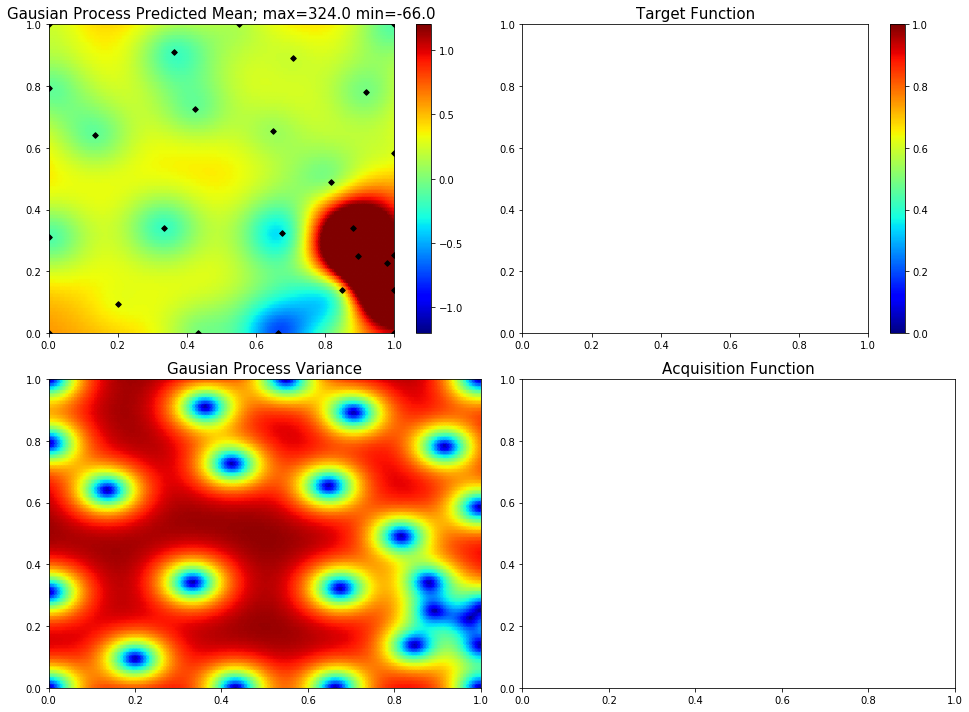

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.5044562623877522, 0.48113903895820215]
79  Evaluations Remaining
|  27       | -0.3638   |  0.5045   |  0.4811   |
myplot:  027


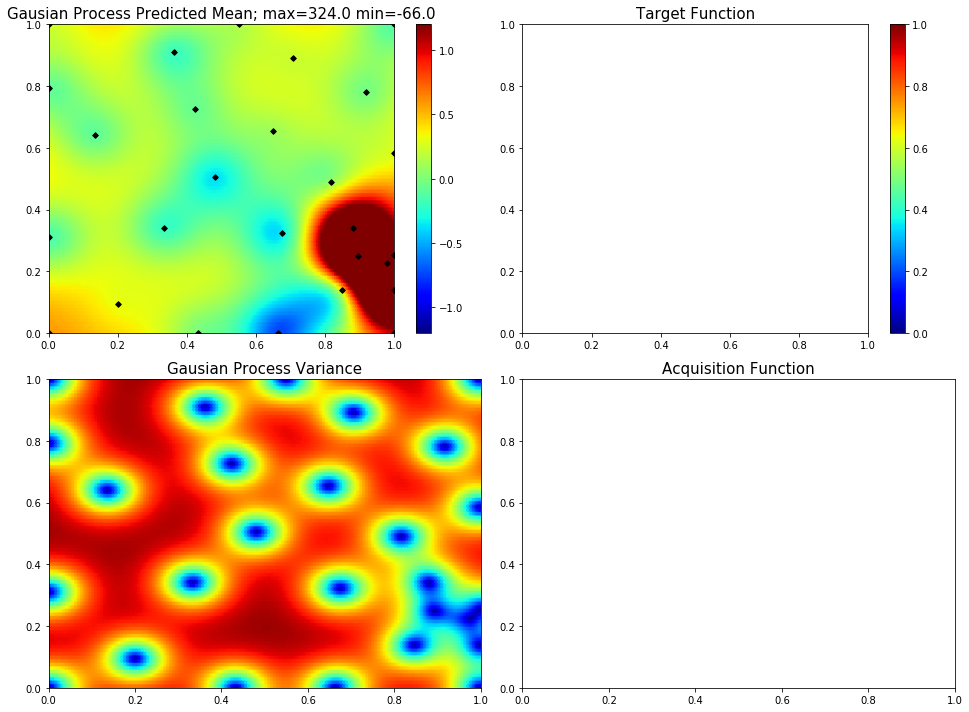

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [1.0, 0.19070164669528]
78  Evaluations Remaining
|  28       |  0.007855 |  1.0      |  0.1907   |
myplot:  028


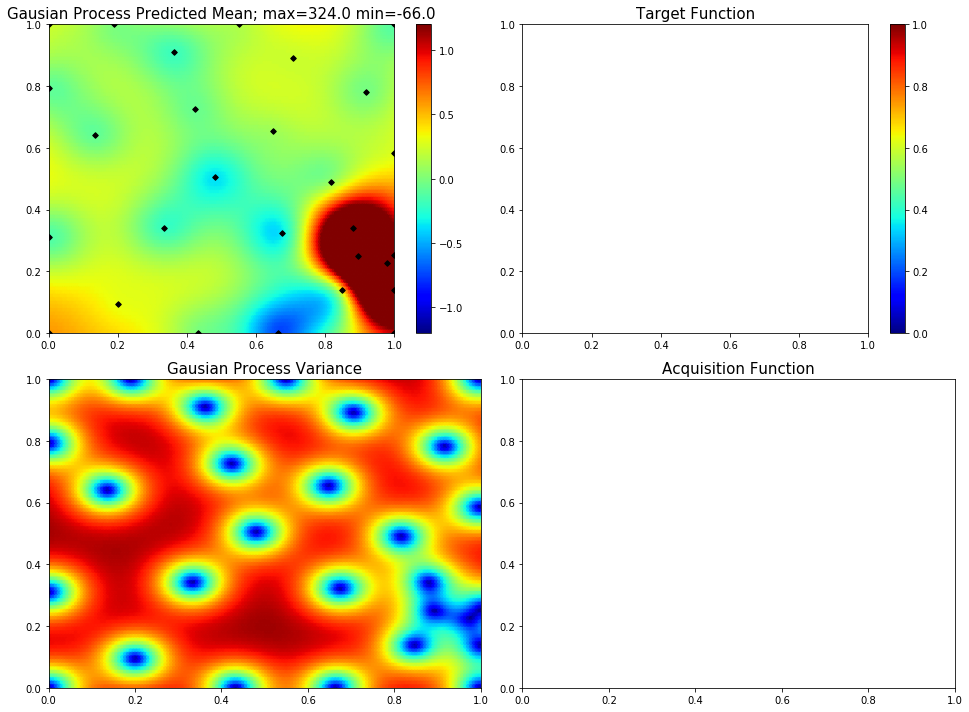

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.5132164131744956, 0.0]
77  Evaluations Remaining
|  29       | -0.4063   |  0.5132   |  0.0      |
myplot:  029


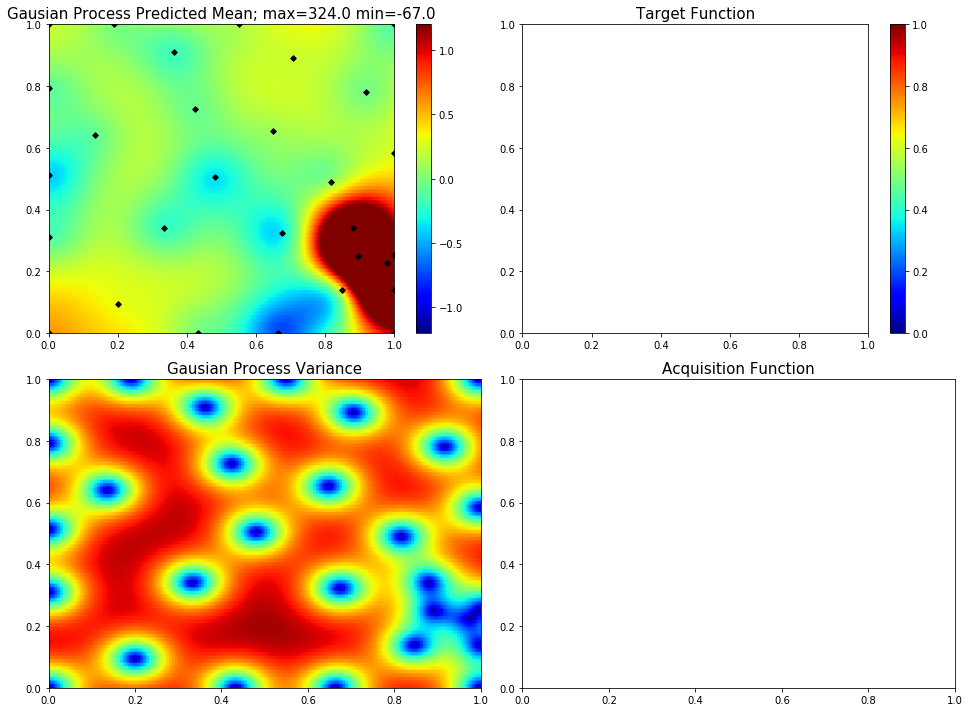

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.4159532302723799, 1.0]
76  Evaluations Remaining
|  30       |  0.8101   |  0.416    |  1.0      |
myplot:  030


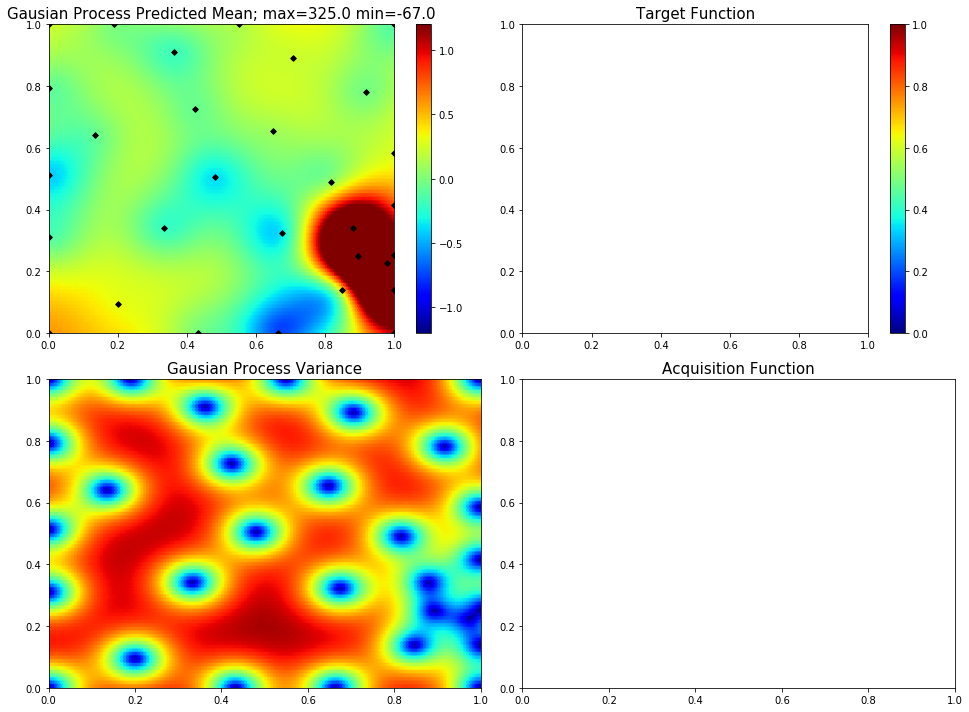

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.19633625109117606, 0.4822882317422592]
75  Evaluations Remaining
|  31       | -0.2834   |  0.1963   |  0.4823   |
myplot:  031


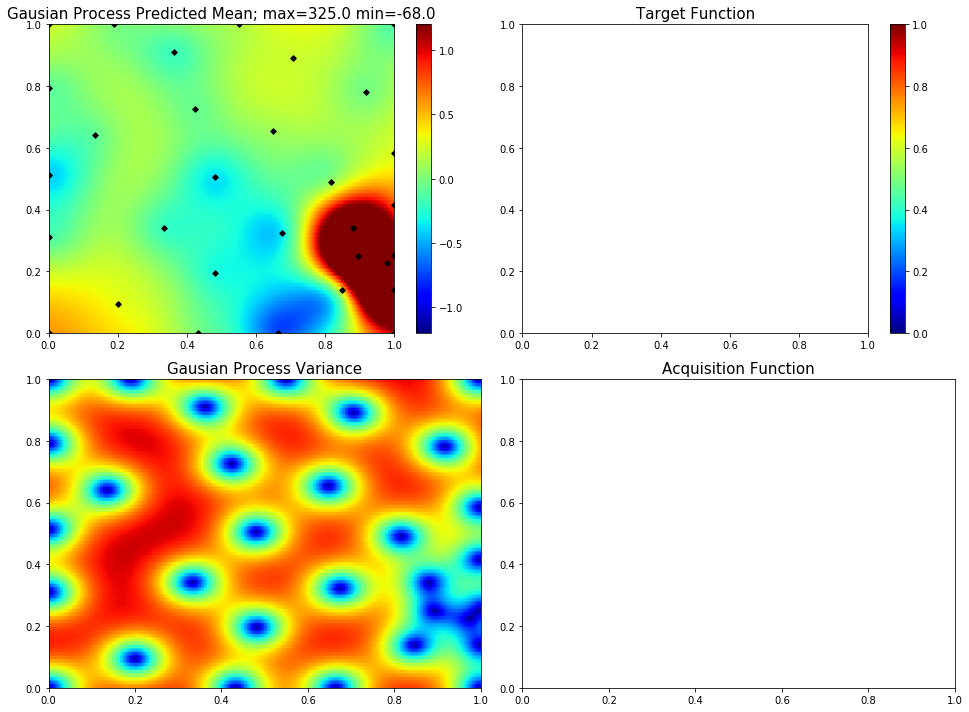

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [1.0, 0.8173894763741241]
74  Evaluations Remaining
|  32       |  0.1287   |  1.0      |  0.8174   |
myplot:  032


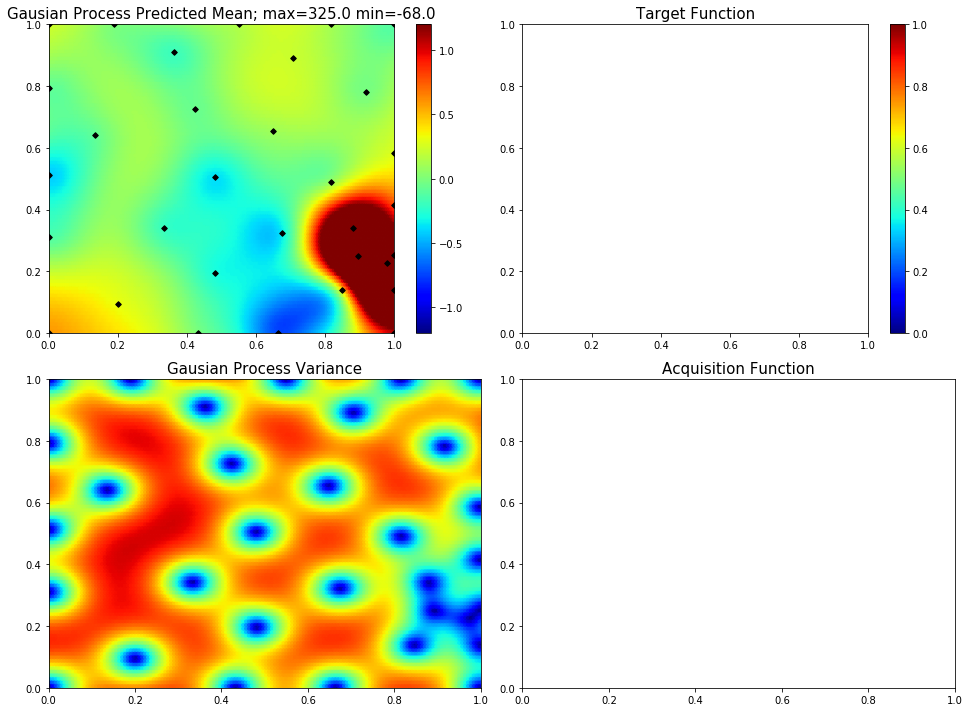

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.5280696950281729, 0.2742359995327756]
73  Evaluations Remaining
|  33       | -0.2678   |  0.5281   |  0.2742   |
myplot:  033


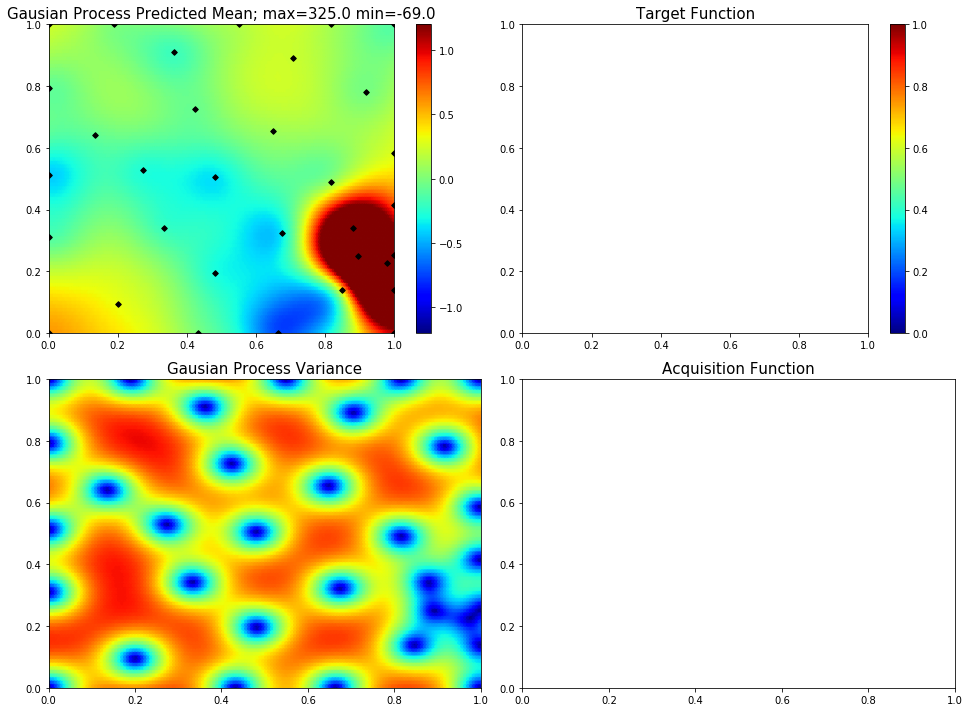

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.14837525031678814, 0.0]
72  Evaluations Remaining
|  34       |  0.1048   |  0.1484   |  0.0      |
myplot:  034


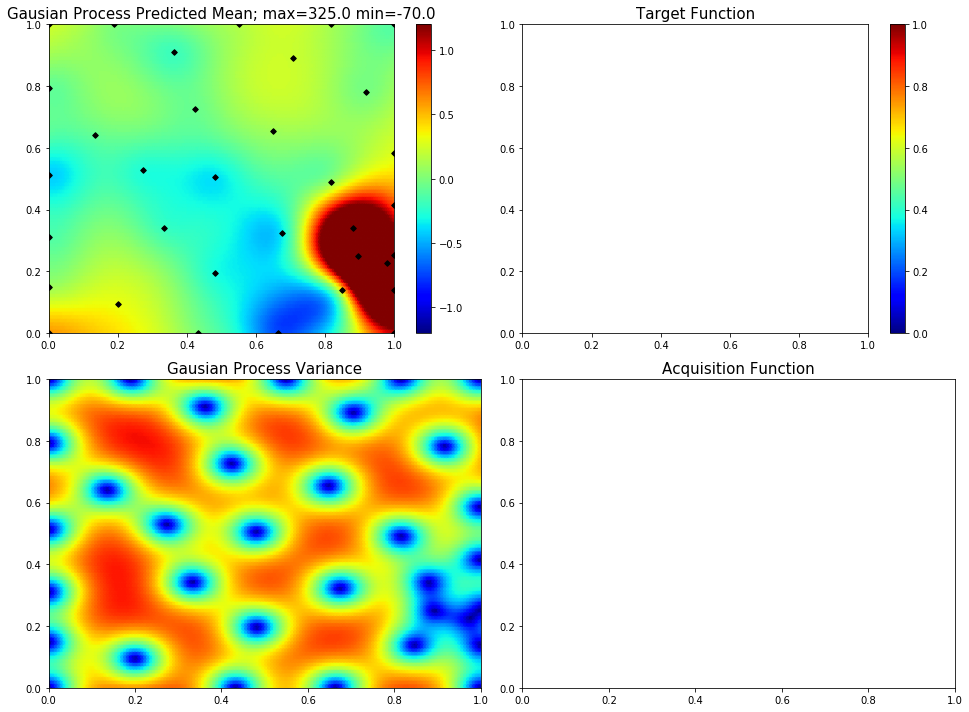

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.802819348799587, 0.20835566485193027]
71  Evaluations Remaining
|  35       |  0.01667  |  0.8028   |  0.2084   |
myplot:  035


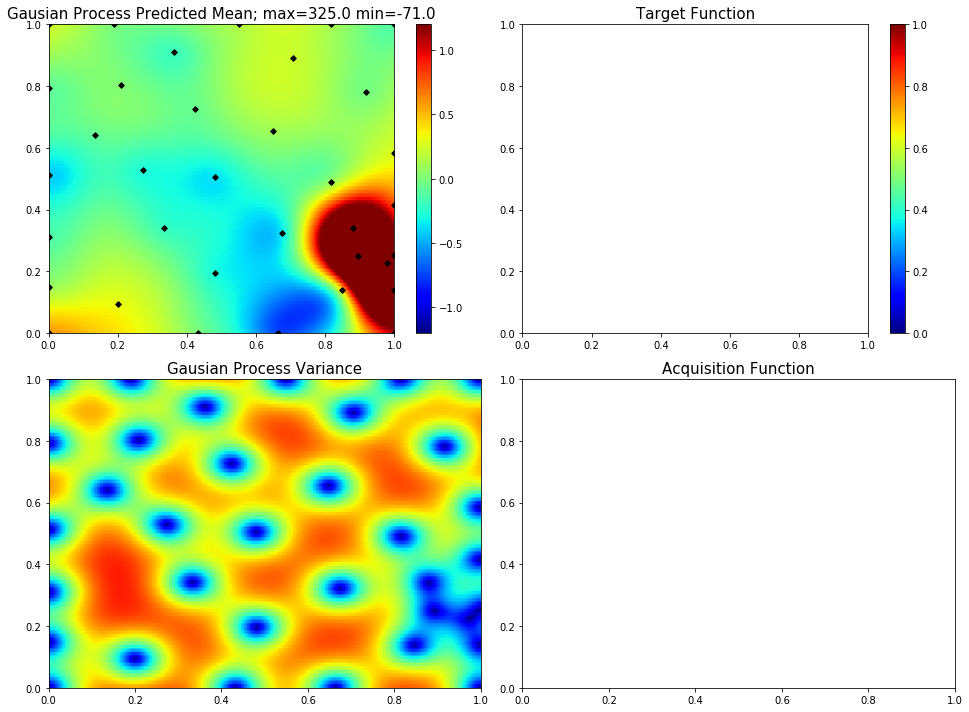

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.2793492334389844, 0.1718500116467436]
70  Evaluations Remaining
|  36       |  0.1537   |  0.2793   |  0.1719   |
myplot:  036


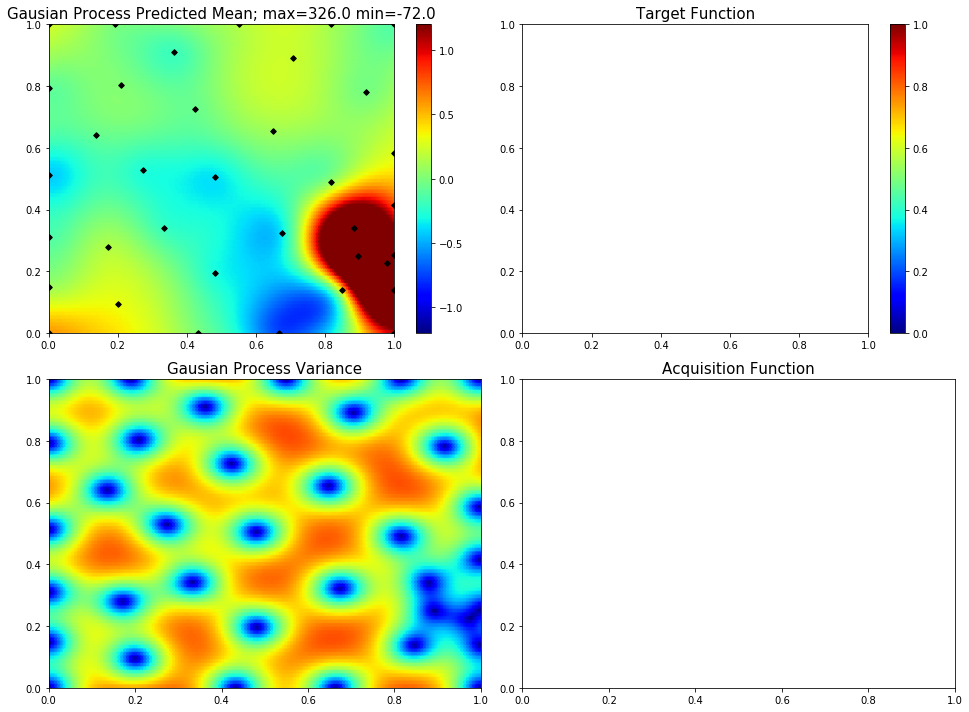

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.8177812085391131, 0.5613438976536862]
69  Evaluations Remaining
|  37       |  0.2244   |  0.8178   |  0.5613   |
myplot:  037


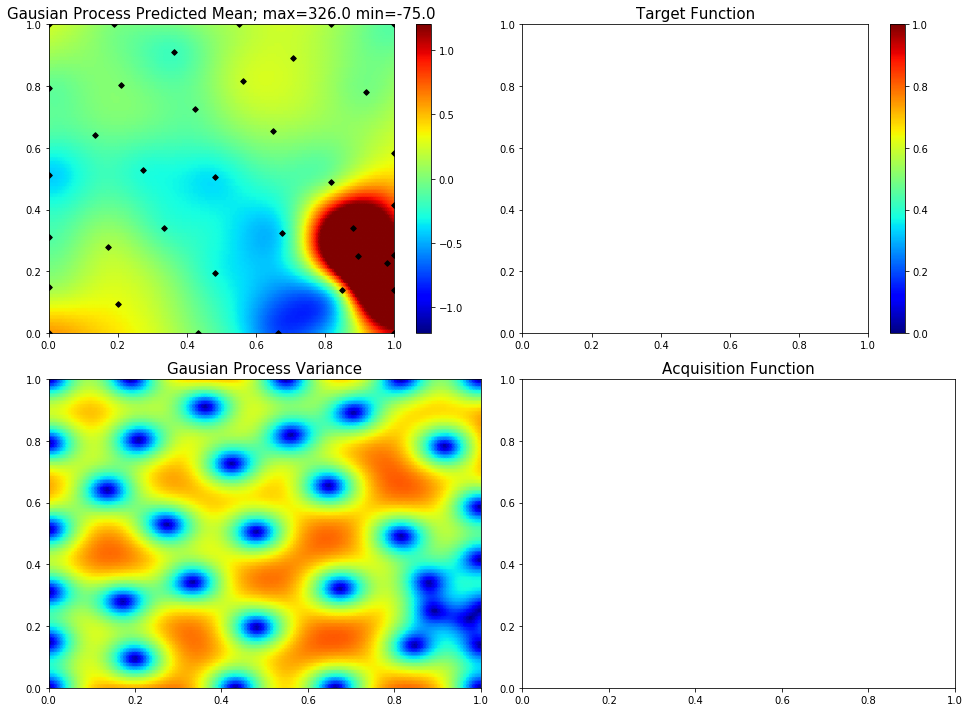

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.17047368851894737, 0.941426906585011]
68  Evaluations Remaining
|  38       |  3.216    |  0.1705   |  0.9414   |
myplot:  038


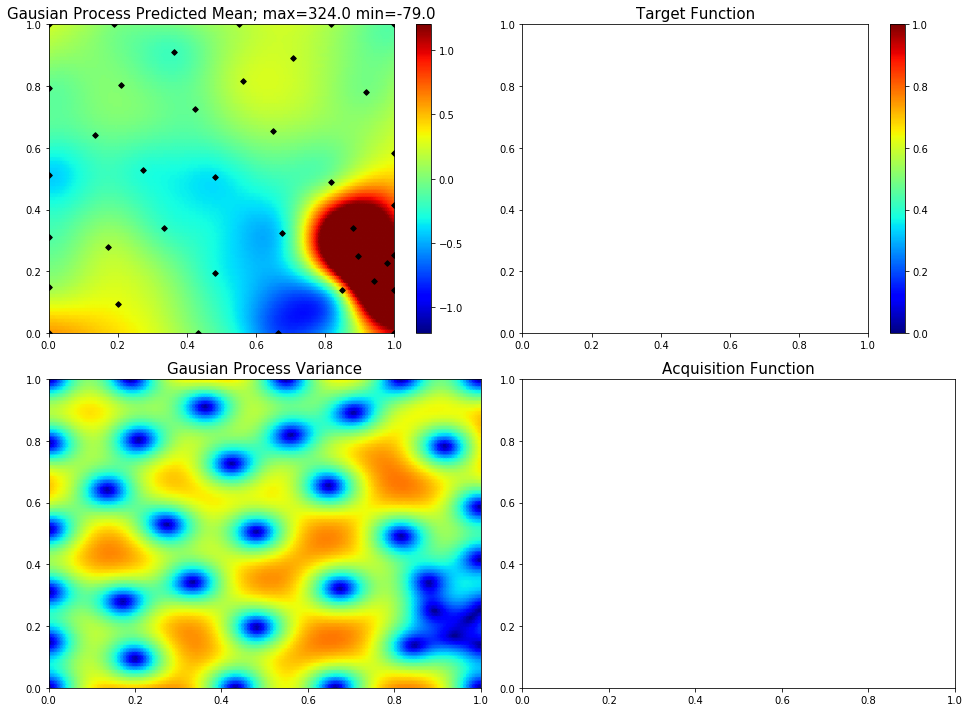

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.0, 0.27786971701887186]
67  Evaluations Remaining
|  39       |  0.0181   |  0.0      |  0.2779   |
myplot:  039


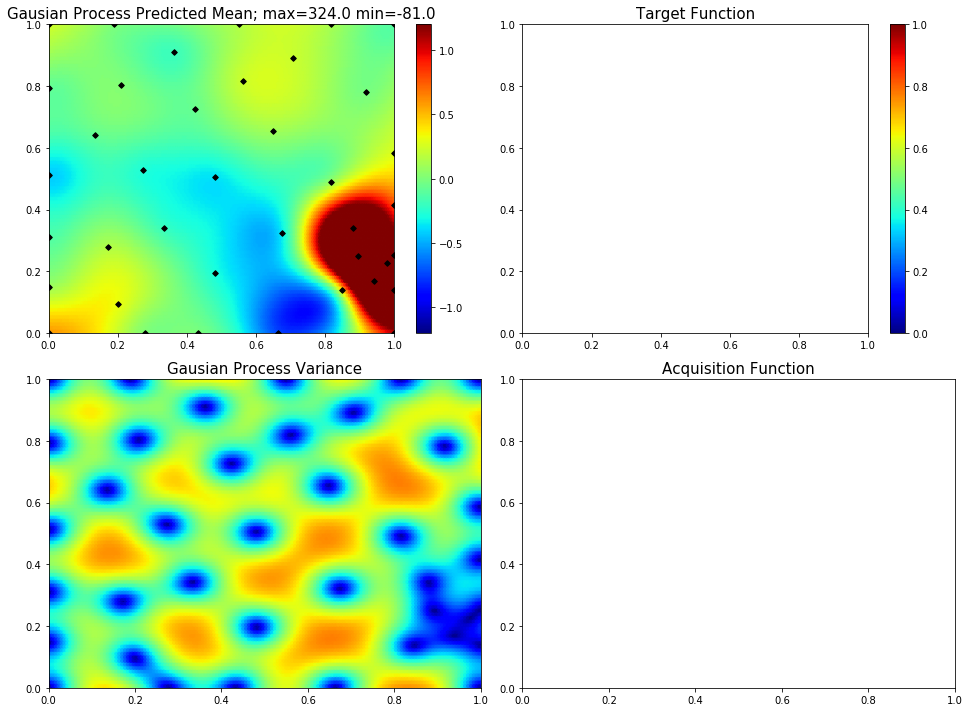

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.281523296875776, 0.8126448412935777]
66  Evaluations Remaining
|  40       |  0.4003   |  0.2815   |  0.8126   |
myplot:  040


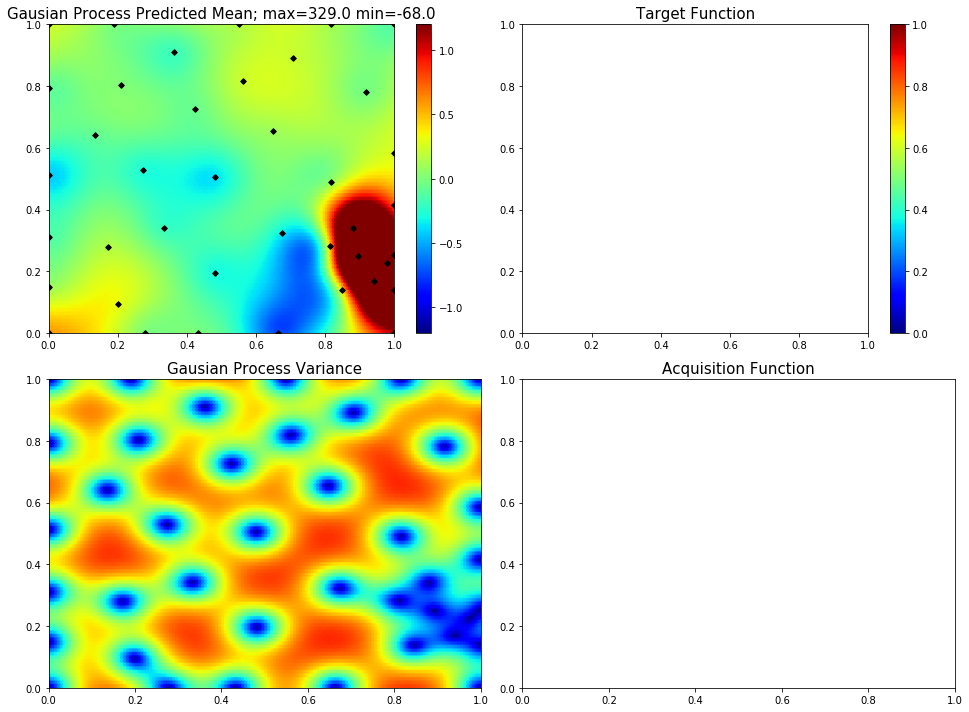

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.6706970349913742, 0.8081880050814787]
65  Evaluations Remaining
|  41       |  0.1635   |  0.6707   |  0.8082   |
myplot:  041


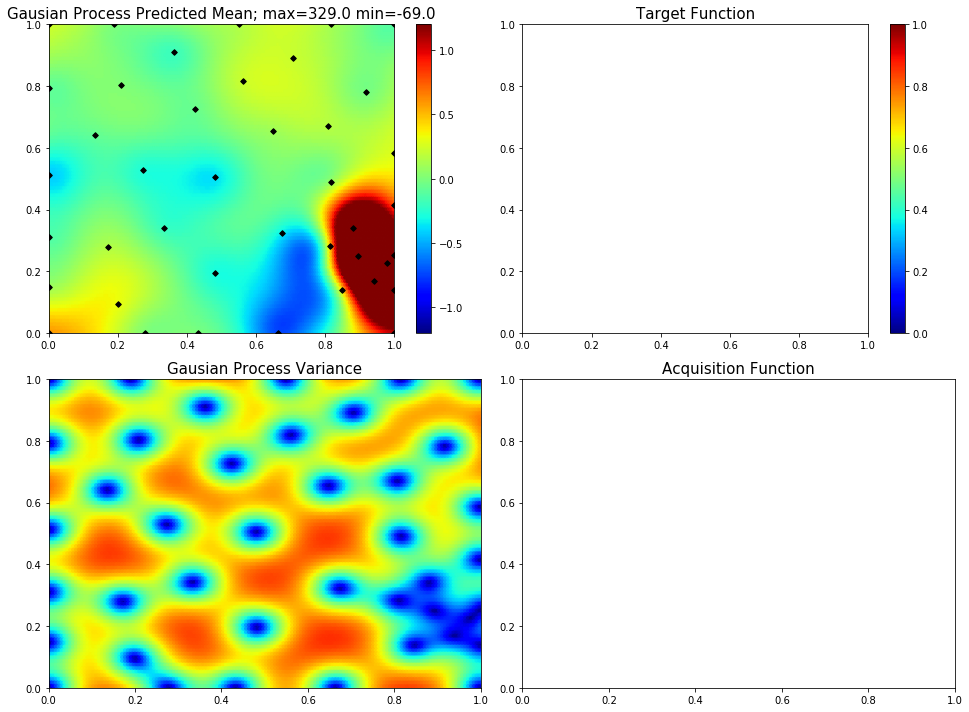

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.29309203008361534, 0.9378142569876264]
64  Evaluations Remaining
|  42       |  2.168    |  0.2931   |  0.9378   |
myplot:  042


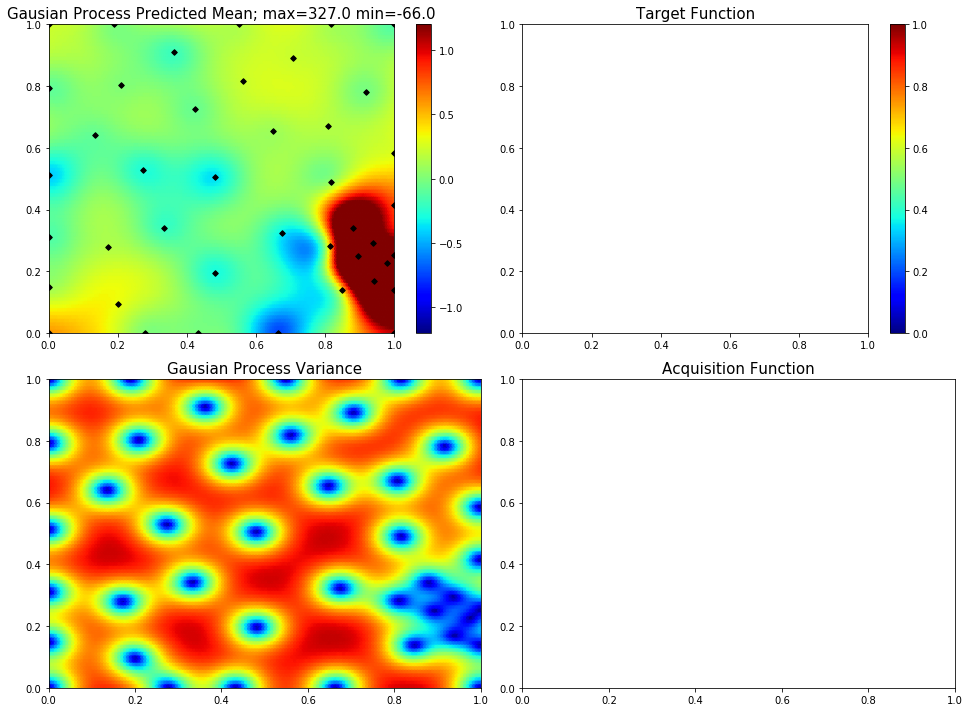

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.0, 0.867574160952713]
63  Evaluations Remaining
|  43       | -0.2948   |  0.0      |  0.8676   |
myplot:  043


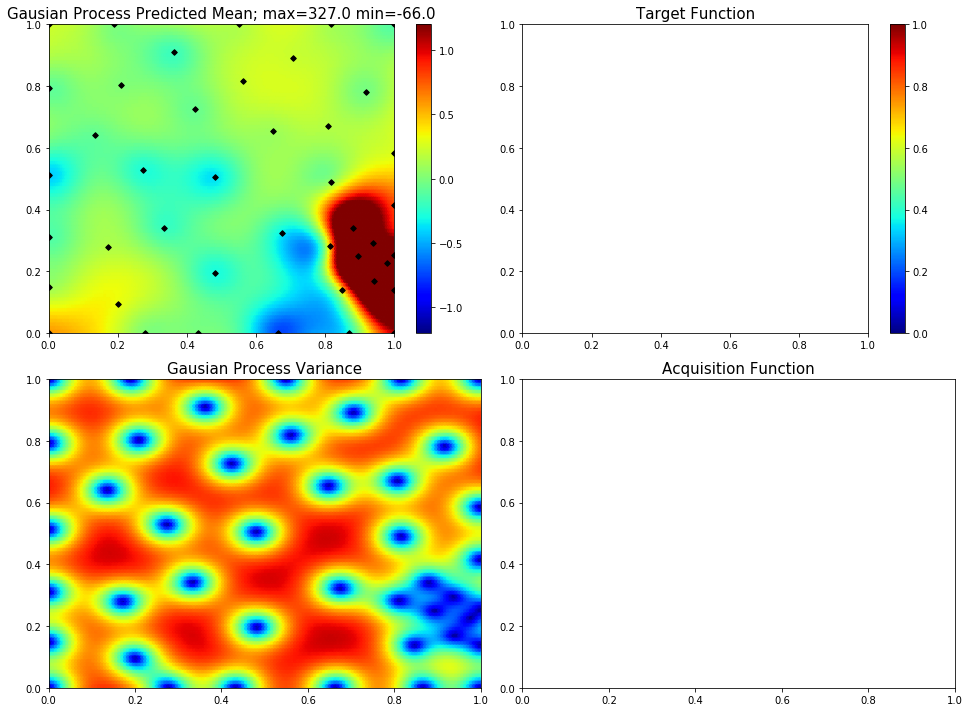

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.4875938468773318, 0.6481238764718938]
62  Evaluations Remaining
|  44       | -0.1514   |  0.4876   |  0.6481   |
myplot:  044


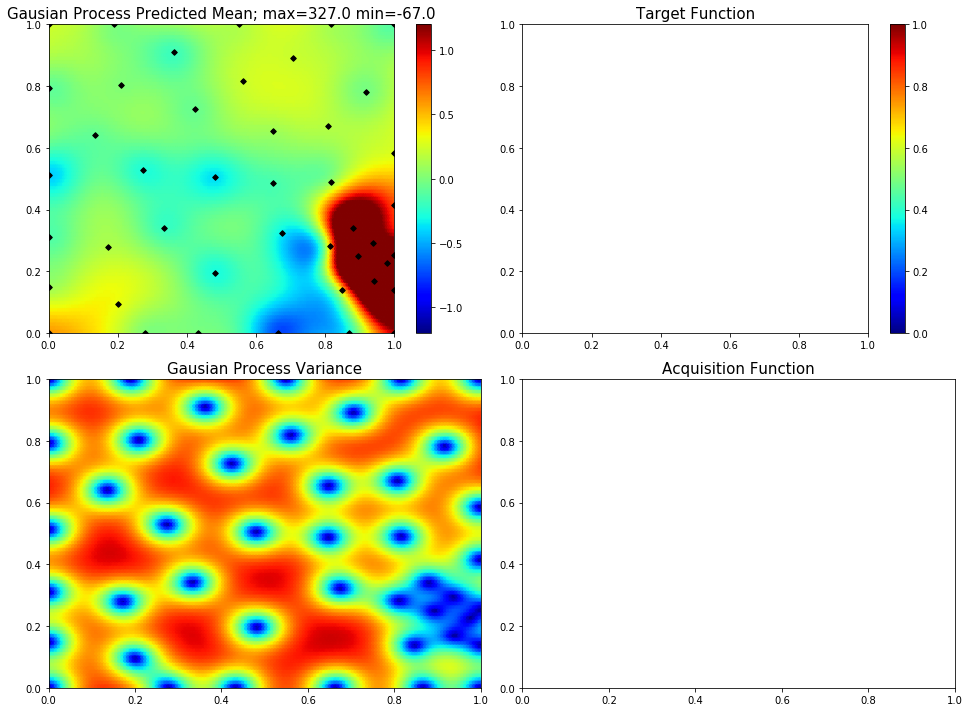

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
action [0.17171548280793403, 0.32249243125367294]
61  Evaluations Remaining
|  45       |  0.1018   |  0.1717   |  0.3225   |
myplot:  045


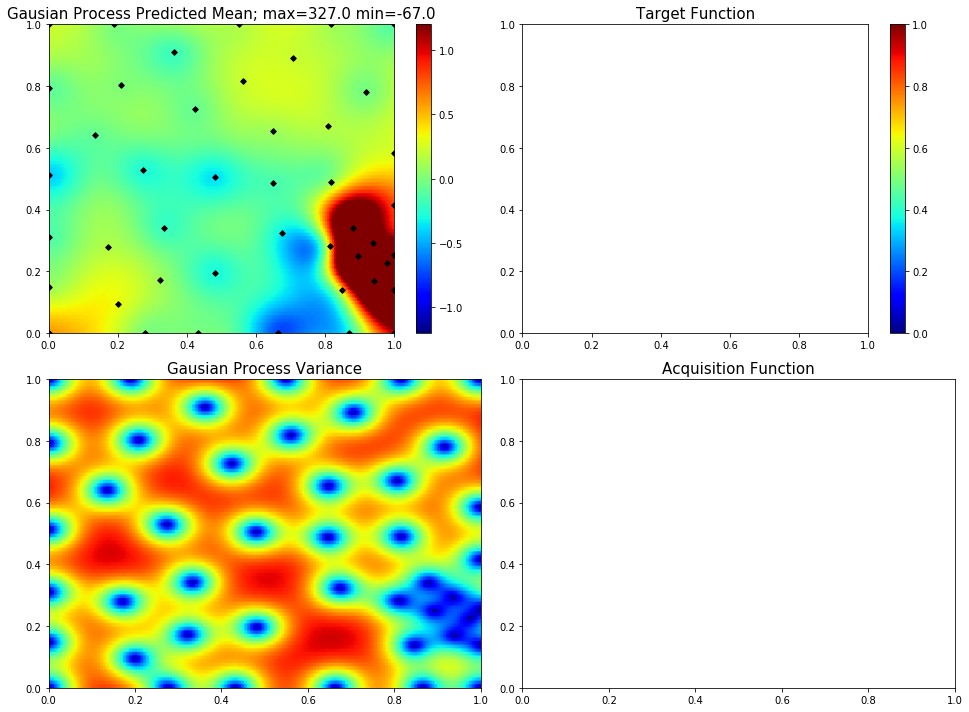

In [49]:
# Turn interactive plotting off
plt.ioff()
#policy =  [ [0.9991712478009906, 0.026881743252439638], [0.19702391566063626, 0.8142634903489118], [0.02287582405055888, 0.6499711714347374], [0.9944402045090077, 0.017507068898582667], [0.7295230492436623, 0.9926887775501024] ]

for i in range(20):
    y1hm.maximize(init_points=0, n_iter=1, acq='ucb', kappa=used_kappa)
    print("myplot: ", "{:03}".format(len(y1hm.space)) )
    plot_2d("{:03}".format(len(y1hm.space)))
    
    if (i==15):
        used_kappa = 6
        
        
        

In [48]:
plot_2d("{:03}".format(len(y1hm.space))

SyntaxError: unexpected EOF while parsing (<ipython-input-48-48436ee39272>, line 1)

# Y2

In [57]:
def Y2_target1(Y1x,Y1y,Y2x,Y2y):
    Y1x = np.asscalar(Y1x)
    Y1y = np.asscalar(Y1y)
    Y2x = np.asscalar(Y2x)
    Y2y = np.asscalar(Y2y)
    action_year1 = [Y1x, Y1y]
    action_year2 = [Y2x, Y2y]
    #print("action_year1 ",action_year1)
    
    #with suppress_stdout():
    env.reset()
    s,reward_year1,d,_ = env.evaluateAction(action_year1)
    s,reward_year2,d,_ = env.evaluateAction(action_year1)
    return reward_year1/90.0 + reward_year2/90.0    

def Y2_target(Y1x,Y1y,Y2x,Y2y):
    if type(Y1x) is np.ndarray:
        result = []
        for a,b,c,d in zip(Y1x,Y1y,Y2x,Y2y):
            reward = Y2_target1(a,b,c,d)
            result.append( reward )
            #print((len(result) % 30 ) )
            #if ((len(result) % 30 ) > 25) : 
            #    global env
            #    env = newHoleEnv()
        return result
    else:
        return Y2_target1(Y1x,Y1y,Y2x,Y2y)

In [59]:
env = newHoleEnv()

y2hm = BayesianOptimization(Y2_target, {'Y1x': (x_start, x_end), 'Y1y': (x_start, x_end), 'Y2x': (x_start, x_end), 'Y2y': (x_start, x_end)})

y2hm.maximize(init_points=15, n_iter=0, acq='ucb', kappa=10)

for i in range(30):
    y2hm.maximize(init_points=0, n_iter=1, acq='ucb', kappa=9)
    
for i in range(5):
    y2hm.maximize(init_points=0, n_iter=1, acq='ucb', kappa=2.5)
    
    
y2hm.maximize(init_points=0, n_iter=1, acq='ucb', kappa=0)

util = UtilityFunction( kind='ucb', kappa=0, xi=0.0)
print( y2hm.suggest(util) )
util = UtilityFunction( kind='ucb', kappa=1, xi=0.0)
print( y2hm.suggest(util) )

|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
-------------------------------------------------------------------------
105  Evaluations Remaining
104  Evaluations Remaining
|  1        | -0.3662   |  0.8268   |  0.05121  |  0.3218   |  0.8699   |
103  Evaluations Remaining
102  Evaluations Remaining
|  2        | -0.08825  |  0.05454  |  0.5337   |  0.7685   |  0.3059   |
101  Evaluations Remaining
100  Evaluations Remaining
|  3        | -0.4844   |  0.5509   |  0.6429   |  0.2751   |  0.6074   |
99  Evaluations Remaining
98  Evaluations Remaining
|  4        |  0.4973   |  0.1555   |  0.1023   |  0.3378   |  0.6219   |
97  Evaluations Remaining
96  Evaluations Remaining
|  5        |  0.5916   |  0.4304   |  0.1035   |  0.4729   |  0.00571  |
95  Evaluations Remaining
94  Evaluations Remaining
|  6        | -0.2549   |  0.856    |  0.6481   |  0.09991  |  0.2613   |
93  Evaluations Remaining
92  Evaluations Remaining
|  7        |  0.02524  |  0.000499 | 

|  29       |  0.1815   |  0.4695   |  1.0      |  0.5142   |  0.0      |
|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
-------------------------------------------------------------------------
47  Evaluations Remaining
46  Evaluations Remaining
|  30       |  0.01106  |  1.0      |  0.4892   |  0.5664   |  0.0      |
|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
-------------------------------------------------------------------------
45  Evaluations Remaining
44  Evaluations Remaining
|  31       | -1.56     |  0.5077   |  1.0      |  1.0      |  0.5078   |
|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
-------------------------------------------------------------------------
43  Evaluations Remaining
42  Evaluations Remaining
|  32       | -0.06747  |  1.0      |  0.3288   |  0.0      |  1.0      |
|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
------------------------------

7  Evaluations Remaining
6  Evaluations Remaining
|  50       |  0.2256   |  0.4441   |  0.3659   |  0.3719   |  0.0      |
|   iter    |  target   |    Y1x    |    Y1y    |    Y2x    |    Y2y    |
-------------------------------------------------------------------------
5  Evaluations Remaining
4  Evaluations Remaining
|  51       |  0.4326   |  0.3296   |  0.04883  |  0.4441   |  0.0      |
{'Y1x': 0.48911685772021957, 'Y1y': 0.1165469712541412, 'Y2x': 0.4202003091163255, 'Y2y': 0.0}
{'Y1x': 0.206447420396023, 'Y1y': 0.0, 'Y2x': 0.20108070245197904, 'Y2y': 0.441600336930326}


In [ ]:
def myRandom():
    return rand.random() # return round(rand.random(), 2)# TODO: remove this round thig # TODO run it more 

def GetRandPolicy():
    policy=[]
    policy.append([myRandom(),myRandom()])
    policy.append([myRandom(),myRandom()])
    policy.append([myRandom(),myRandom()])
    policy.append([myRandom(),myRandom()])
    policy.append([myRandom(),myRandom()]) 
    return policy


evolution = []
policies = []
maxReward= 0.0
nbTestedPolicy = 0


In [ ]:
for _ in range(50000):
    if (nbTestedPolicy % 1000 == 0 ):
        print('nbTestedPolicy',nbTestedPolicy)
    nbTestedPolicy += 1
    
    policy = {}
    policy['nwemer'] = GetRandPolicy()
    with suppress_stdout():
        potentialReward = invRL(policy['nwemer'])
    if np.sum(potentialReward)<maxReward*0.9: continue
    print(policy)
        

    policy['AvgReward'] = np.mean(potentialReward)
    policy['maxRewards'] = np.max(potentialReward)
    policy['totRewards'] = np.sum(potentialReward)
    policy['Rewards'] = potentialReward
    policies.append(policy)



    policies.sort(key=lambda r: -r['totRewards'])
    evolution.append(policies[0]['AvgReward'])
    maxReward=policies[0]['totRewards']
    print("##################################################################")
    clear_output()
    
    print('totRewards',round(policies[0]['totRewards']))
    print('rewards',policies[0]['AvgReward'])
    print('maxRewards',round(policies[0]['maxRewards']))
    print('nbTestedPolicy',nbTestedPolicy)
    
    
    if len(policies)>10: 
        policies = policies[0:9]
    print(policies)
    print("##################################################################")
    print(evolution)

In [ ]:
print('totRewards',policies[0]['totRewards'])
print('rewards',policies[0]['AvgReward'])
print('maxRewards',policies[0]['maxRewards'])
print('nbTestedPolicy',nbTestedPolicy)
policies[0]

In [ ]:
plot_2d()

In [62]:
env = newHoleEnv()
action = [0.9 , 0.1]
s,r,d,_ = env.evaluateAction(action)
r

105  Evaluations Remaining


26.809906351955796